# EasyAI
### Autorzy: Jakub Kot, Dawid Małecki

## Cel ćwiczenia
Nauka podstawowych algorytmów decyzyjnych i ich porównanie na przykładzie gry w nim.

## Opis problemu
Implementacja i porównanie algorytmów decyzyjnych na przykładzie gry w probabilistyczną wersję nim (każdy ruch ma 10% szans na zabranie o jeden mniej przedmiot ze stosu)

## Realizacja rozwiązania
Zaimplementowano algorytmy decyzyjne w języku Python z pomocą biblioteki EasyAI, a następnie porównano wyniki.

## Podjęte próby rozwiązania
- Wzięcie gotowej gry Nim oraz algorytmu Negamax z biblioteki easyAI
- Dodanie niedeterministyczności do gry
- Usunięcie alfa beta pruning z algorytmu Negamax
- Przetestowanie algorytmu Negamax na różnych głębokościach (ostatecznie zdecydowaliśmy się na maksymalną głębokość równą 7, bo dla większych czas obliczeń stawał się zdecydowanie zbyt długi)
- Przetestowanie algorytmu State Space Search
- Modyfikacja algorytmu Negamax na algorytm Expectiminimax
- Porównanie wyników z innymi algorytmami
- Prezentacja z wykorzystaniem wykresów

In [2]:
from easyAI.AI import NegamaxNoPruning
from easyAI import TwoPlayerGame, Human_Player, AI_Player, Negamax, NegamaxNoPruning, NonRecursiveNegamax, SSS, Expectiminimax
import random
from tqdm.auto import tqdm
import pandas as pd

### Implementacja nim z niedeterministycznością
Kod bazowany na przykładowym kodzie z dokumentacji EasyAI

In [ ]:
class Nim(TwoPlayerGame):
    def __init__(self, players, piles = [5, 5, 5, 5], deterministic = False):
        self.piles = piles
        self.players = players
        self.nplayer = 1
        self.current_player = 1
        self.deterministic = deterministic
    
    def possible_moves(self):
        moves = ["%d,%d" % (i + 1, j) for i in range(len(self.piles)) for j in range(1, self.piles[i] + 1)]
        return moves
    
    def make_final_move(self, move):
        pile, count = move.split(",")
        extra = 1 if random.randint(1, 10) == 1 and not self.deterministic else 0
        self.piles[int(pile) - 1] -= int(count) - extra
        return extra
    
    def make_move(self, move):
        pile, count = move.split(",")
        self.piles[int(pile) - 1] -= int(count)

    def unmake_move(self, move): # optional method (speeds up the AI)
        pile, count = move.split(",")
        self.piles[int(pile) - 1] += int(count)

    def show(self): print(" ".join(map(str, self.piles)))

    def win(self): return max(self.piles) == 0

    def is_over(self): return self.win()

    def scoring(self): return 100 if self.win() else 0

    def ttentry(self): return tuple(self.piles) #optional, speeds up AI

    def ttrestore(self, entry): self.piles = list(entry)

Wszystkie algorytmy są zrobione osobno, bo przy próbie ufuunkcjonowania ich w jednym pliku biblioteka EasyAI nie chciała współpracować.

# Negamax
Gotowy algorytm z biblioteki EasyAI

In [ ]:
# Win tracking dict
results = {}

depths = [3, 7]
deterministic = [True, False]
game_amount = 10

for d1, d2 in tqdm([(d1, d2) for d1 in depths for d2 in depths], desc="Processing depths"):
    for det in tqdm(deterministic, desc="Processing deterministic"):
        # print(f"depth1: {d1}, depth2: {d2} deterministic: {det}")
        
        # Play 10 games and track the results
        p1_wins = 0
        p2_wins = 0
        p1_avg_time = 0
        p2_avg_time = 0

        for x in tqdm(range(game_amount), desc="Playing games"):
            ai = Negamax(d1)
            ai2 = Negamax(d2)
            game = Nim(players=[AI_Player(ai), AI_Player(ai2)],
                    deterministic=det,
                    piles=[5,5,5,5])
            p1_time, p2_time = game.play(verbose=False)
            p1_avg_time += p1_time
            p2_avg_time += p2_time
            # print("\nplayer %d wins\n" % game.current_player)
            if game.current_player == 1:
                p1_wins += 1
            else:
                p2_wins += 1 

        p1_avg_time /= game_amount
        p2_avg_time /= game_amount
        results[(d1, d2, det)] = {"p1_wins": p1_wins,
                                    "p2_wins": p2_wins,
                                    "p1_average_game_time": p1_avg_time,
                                    "p2_average_game_time": p2_avg_time} # Update the results

print(results)

# Negamax bez alpha-beta pruning

Przerobiony algorytm z biblioteki EasyAI, usunęliśmy cały kod odpowiedzialny za prunowanie gałęzi.

In [ ]:
# Win tracking dict
results = {}

depths = [3, 7]
deterministic = [True, False]
game_amount = 10

for d1, d2 in tqdm([(d1, d2) for d1 in depths for d2 in depths], desc="Processing depths"):
    for det in tqdm(deterministic, desc="Processing deterministic"):
        # print(f"depth1: {d1}, depth2: {d2} deterministic: {det}")
        
        # Play 10 games and track the results
        p1_wins = 0
        p2_wins = 0
        p1_avg_time = 0
        p2_avg_time = 0

        for x in tqdm(range(game_amount), desc="Playing games"):
            ai = NegamaxNoPruning(d1)
            ai2 = NegamaxNoPruning(d2)
            game = Nim(players=[AI_Player(ai), AI_Player(ai2)],
                    deterministic=det,
                    piles=[5,5,5,5])
            p1_time, p2_time = game.play(verbose=False)
            p1_avg_time += p1_time
            p2_avg_time += p2_time
            # print("\nplayer %d wins\n" % game.current_player)
            if game.current_player == 1:
                p1_wins += 1
            else:
                p2_wins += 1 

        p1_avg_time /= game_amount
        p2_avg_time /= game_amount
        results[(d1, d2, det)] = {"p1_wins": p1_wins,
                                    "p2_wins": p2_wins,
                                    "p1_average_game_time": p1_avg_time,
                                    "p2_average_game_time": p2_avg_time} # Update the results

print(results)

# Non Recursive Negamax
Gotowy algorytm z biblioteki EasyAI

In [ ]:
# Win tracking dict
results = {}

depths = [3, 7]
deterministic = [True, False]
game_amount = 10

for d1, d2 in tqdm([(d1, d2) for d1 in depths for d2 in depths], desc="Processing depths"):
    for det in tqdm(deterministic, desc="Processing deterministic"):
        # print(f"depth1: {d1}, depth2: {d2} deterministic: {det}")
        
        # Play 10 games and track the results
        p1_wins = 0
        p2_wins = 0
        p1_avg_time = 0
        p2_avg_time = 0

        for x in tqdm(range(game_amount), desc="Playing games"):
            ai = NonRecursiveNegamax(d1)
            ai2 = NonRecursiveNegamax(d2)
            game = Nim(players=[AI_Player(ai), AI_Player(ai2)],
                    deterministic=det,
                    piles=[5,5,5,5])
            p1_time, p2_time = game.play(verbose=False)
            p1_avg_time += p1_time
            p2_avg_time += p2_time
            # print("\nplayer %d wins\n" % game.current_player)
            if game.current_player == 1:
                p1_wins += 1
            else:
                p2_wins += 1 

        p1_avg_time /= game_amount
        p2_avg_time /= game_amount
        results[(d1, d2, det)] = {"p1_wins": p1_wins,
                                    "p2_wins": p2_wins,
                                    "p1_average_game_time": p1_avg_time,
                                    "p2_average_game_time": p2_avg_time} # Update the results

print(results)

# SSS
State Space Search

Gotowy algorytm z biblioteki EasyAI

In [ ]:
# Win tracking dict
results = {}

depths = [3, 7]
deterministic = [True, False]
game_amount = 10

for d1, d2 in tqdm([(d1, d2) for d1 in depths for d2 in depths], desc="Processing depths"):
    for det in tqdm(deterministic, desc="Processing deterministic"):
        # print(f"depth1: {d1}, depth2: {d2} deterministic: {det}")
        
        # Play 10 games and track the results
        p1_wins = 0
        p2_wins = 0
        p1_avg_time = 0
        p2_avg_time = 0

        for x in tqdm(range(game_amount), desc="Playing games"):
            ai = SSS(d1)
            ai2 = SSS(d2)
            game = Nim(players=[AI_Player(ai), AI_Player(ai2)],
                    deterministic=det,
                    piles=[5,5,5,5])
            p1_time, p2_time = game.play(verbose=False)
            p1_avg_time += p1_time
            p2_avg_time += p2_time
            # print("\nplayer %d wins\n" % game.current_player)
            if game.current_player == 1:
                p1_wins += 1
            else:
                p2_wins += 1 

        p1_avg_time /= game_amount
        p2_avg_time /= game_amount
        results[(d1, d2, det)] = {"p1_wins": p1_wins,
                                    "p2_wins": p2_wins,
                                    "p1_average_game_time": p1_avg_time,
                                    "p2_average_game_time": p2_avg_time} # Update the results

print(results)

# Expectiminimax

Algorytm zaimplementowany na podstawie algorytmu Negamax, ale z uwzględnieniem niedeterministyczności.
Generalny sposób działania:
~~~
wartość przewidywana = 0
jeżeli gra jest niedeterministyczna:
    wartość przewidywana += zrób zwykły ruch * szansa na zwykły ruch
    wartość przewidywana += zrób ruch z niedeterministycznością * szansa na ruch z niedeterministycznością
jeżeli gra jest deterministyczna:
    wartość przewidywana += zrób zwykły ruch
zwróć wartość przewidywana
~~~

In [ ]:
# Win tracking dict
results = {}

depths = [3, 7]
deterministic = [True, False]
game_amount = 10

for d1, d2 in tqdm([(d1, d2) for d1 in depths for d2 in depths], desc="Processing depths"):
    for det in tqdm(deterministic, desc="Processing deterministic"):
        # print(f"depth1: {d1}, depth2: {d2} deterministic: {det}")
        
        # Play 10 games and track the results
        p1_wins = 0
        p2_wins = 0
        p1_avg_time = 0
        p2_avg_time = 0

        for x in tqdm(range(game_amount), desc="Playing games"):
            ai = Expectiminimax(d1)
            ai2 = Expectiminimax(d2)
            game = Nim(players=[AI_Player(ai), AI_Player(ai2)],
                    deterministic=det,
                    piles=[5,5,5,5])
            p1_time, p2_time = game.play(verbose=False)
            p1_avg_time += p1_time
            p2_avg_time += p2_time
            # print("\nplayer %d wins\n" % game.current_player)
            if game.current_player == 1:
                p1_wins += 1
            else:
                p2_wins += 1 

        p1_avg_time /= game_amount
        p2_avg_time /= game_amount
        results[(d1, d2, det)] = {"p1_wins": p1_wins,
                                    "p2_wins": p2_wins,
                                    "p1_average_game_time": p1_avg_time,
                                    "p2_average_game_time": p2_avg_time} # Update the results

print(results)

## Rezultaty

In [26]:
# read txt, it contains a dict, assign it to a variable
with open("results/Negamax.txt", "r") as file:
    negamax_results = eval(file.read())
with open("results/NegamaxNoPruning.txt", "r") as file:
    negamax_no_pruning_results = eval(file.read())
with open("results/NonRecursiveNegamax.txt", "r") as file:
    non_recursive_negamax_results = eval(file.read())
with open("results/SSS.txt", "r") as file:
    sss_results = eval(file.read())
with open("results/Expectiminimax.txt", "r") as file:
    expectiminimax_results = eval(file.read())

In [27]:
negamax_results.keys()

dict_keys([(3, 3, True), (3, 3, False), (3, 7, True), (3, 7, False), (7, 3, True), (7, 3, False), (7, 7, True), (7, 7, False)])

In [28]:
def prepare_dataframe(results, det, algorithm_name):
    # Only take keys with deterministic = det, also remove the deterministic key
    results = {k: v for k, v in results.items() if k[2] == det}
    results = {k[:2]: v for k, v in results.items()}

    # Convert to dataframes
    df = pd.DataFrame(results)
    # Swap rows with columns
    df = df.transpose()
    # Change column names
    df.columns = ["P1 wins", "P2 wins", "P1 average turn time", "P2 average turn time"]
    # Add column for the depth
    df["Depth"] = df.index
    # Convert float to int
    df["P1 wins"] = df["P1 wins"].astype(int)
    df["P2 wins"] = df["P2 wins"].astype(int)
    # Add column for the algorithm name
    df["Algorithm"] = algorithm_name
    return df

In [29]:
# Append all deterministic dataframes together
df_deterministic = pd.concat([prepare_dataframe(negamax_results, True, "Negamax"),
                prepare_dataframe(negamax_no_pruning_results, True, "NegamaxNoPruning"),
                prepare_dataframe(non_recursive_negamax_results, True, "NonRecursiveNegamax"),
                prepare_dataframe(sss_results, True, "SSS"),
                prepare_dataframe(expectiminimax_results, True, "Expectiminimax")])

df_deterministic.reset_index(drop=True, inplace=True)
df_deterministic

,P1 wins,P2 wins,P1 average turn time,P2 average turn time,Depth,Algorithm
0,0,10,0.000323,0.000326,"(3, 3)",Negamax
1,0,10,0.000300,0.022325,"(3, 7)",Negamax
2,10,0,0.028406,0.000323,"(7, 3)",Negamax
3,0,10,0.023934,0.021653,"(7, 7)",Negamax
4,0,10,0.002352,0.002235,"(3, 3)",NegamaxNoPruning
5,0,10,0.002285,6.192901,"(3, 7)",NegamaxNoPruning
6,10,0,9.457784,0.002167,"(7, 3)",NegamaxNoPruning
7,0,10,8.437451,6.304129,"(7, 7)",NegamaxNoPruning
8,0,10,0.000587,0.000570,"(3, 3)",NonRecursiveNegamax
9,0,10,0.000523,0.033737,"(3, 7)",NonRecursiveNegamax


In [30]:
# Append all non-deterministic dataframes together
df_non_deterministic = pd.concat([prepare_dataframe(negamax_results, False, "Negamax"),
                prepare_dataframe(negamax_no_pruning_results, False, "NegamaxNoPruning"),
                prepare_dataframe(non_recursive_negamax_results, False, "NonRecursiveNegamax"),
                prepare_dataframe(sss_results, False, "SSS"),
                prepare_dataframe(expectiminimax_results, False, "Expectiminimax")])

df_non_deterministic.reset_index(drop=True, inplace=True)
df_non_deterministic

,P1 wins,P2 wins,P1 average turn time,P2 average turn time,Depth,Algorithm
0,1,9,0.000377,0.000378,"(3, 3)",Negamax
1,3,7,0.000317,0.022761,"(3, 7)",Negamax
2,7,3,0.025529,0.000292,"(7, 3)",Negamax
3,5,5,0.024704,0.021459,"(7, 7)",Negamax
4,6,4,0.002165,0.001970,"(3, 3)",NegamaxNoPruning
5,4,6,0.002478,6.702793,"(3, 7)",NegamaxNoPruning
6,8,2,9.432900,0.002168,"(7, 3)",NegamaxNoPruning
7,5,5,9.085430,7.044955,"(7, 7)",NegamaxNoPruning
8,5,5,0.000643,0.000551,"(3, 3)",NonRecursiveNegamax
9,2,8,0.000521,0.033183,"(3, 7)",NonRecursiveNegamax


In [31]:
# Convert to csv
df_deterministic.to_csv("results/deterministic.csv", index=False, sep=";")
df_non_deterministic.to_csv("results/non_deterministic.csv", index=False, sep=";")

## Podsumowanie wyników za pomocą wykresów

In [3]:
# Import data from csv
df_deterministic = pd.read_csv("results/deterministic.csv", sep=";")
df_non_deterministic = pd.read_csv("results/non_deterministic.csv", sep=";")

Text(0.5, 0.98, 'Results')

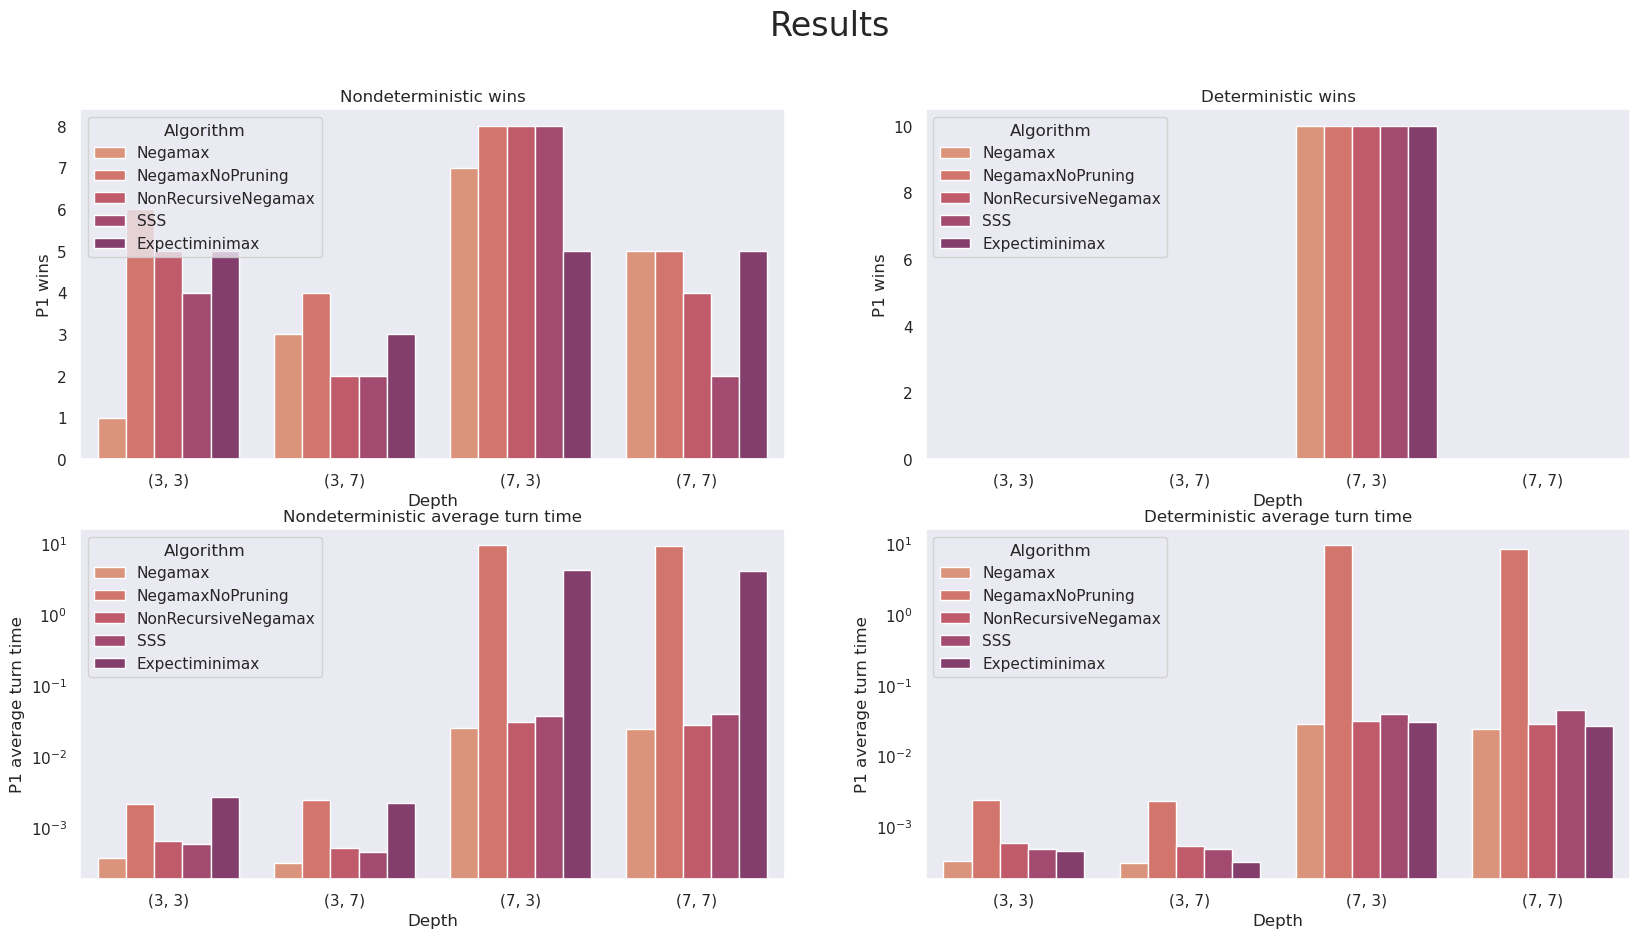

In [44]:
# Create bar graph
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="dark", palette="flare")

# Create a figure and a set of subplots
fig, ax = plt.subplots(2, 2, figsize=(20, 10))


# Create a bar plot
sns.barplot(data=df_non_deterministic, x="Depth", y="P1 wins", hue="Algorithm", ax=ax[0][0])
ax[0][0].set_title("Nondeterministic wins")
sns.barplot(data=df_deterministic, x="Depth", y="P1 wins", hue="Algorithm", ax=ax[0][1])
ax[0][1].set_title("Deterministic wins")

# Create a bar plot logarithmic scale for the y-axis
sns.barplot(data=df_non_deterministic, x="Depth", y="P1 average turn time", hue="Algorithm", ax=ax[1][0])
ax[1][0].set_yscale("log")
ax[1][0].set_title("Nondeterministic average turn time")
sns.barplot(data=df_deterministic, x="Depth", y="P1 average turn time", hue="Algorithm", ax=ax[1][1])
ax[1][1].set_yscale("log")
ax[1][1].set_title("Deterministic average turn time")

# Set the title of the figure
fig.suptitle("Results", fontsize=24)


## Przemyślenia i wnioski
- Głębokość 10 i większa oznacza jakieś sto godzin czekania na wykonanie algorytmu.
- Algorytm Expectiminimax jest lepszy od Negamaxa, ale w tym przypadku nie wpływa na decyzje AI, za to znacząco zwiększa czas wykonania.
- Zaimplementowany w bibliotece EasyAI Transposition Table znacząco przyspiesza działanie algorytmów, przez co tylko pierwsze ruchy zajmują dużo czasu.
- Dokumentacja biblioteki EasyAI zawiera przykładowy kod, który nie działa :D